## 예제 2) Boston House 데이터

In [14]:
import pandas as pd
import requests
from io import StringIO
import warnings
import urllib3

# SSL 경고 메시지 비활성화
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
warnings.filterwarnings('ignore', message='Unverified HTTPS request')

url = 'https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt'
response = requests.get(url, verify=False)
response.raise_for_status()  # 에러 체크

# StringIO를 사용해 텍스트 데이터를 pandas로 읽기
house = pd.read_csv(StringIO(response.text), header=None, sep=r'\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [13]:
from sklearn.tree import DecisionTreeRegressor
X=house.iloc[:, :-1].values
y=house['MEDV'].values

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

from sklearn.ensemble import GradientBoostingRegressor
gbrg=GradientBoostingRegressor(n_estimators=120, max_depth=3)
gbrg.fit(X_train, y_train)
errors=[mean_squared_error(y_test, y_pred) for y_pred in gbrg.staged_predict(X_test)]
bst_n_estimators=np.argmin(errors)
gbrg_best=GradientBoostingRegressor(max_depth=3, n_estimators=bst_n_estimators)
gbrg_best.fit(X_train, y_train)
print(gbrg_best.feature_importances_)

[5.49980557e-02 2.76628929e-05 5.15562922e-03 6.21104369e-04
 1.52334574e-02 2.66139195e-01 1.04251671e-02 7.20802685e-02
 4.83343240e-03 1.58034653e-02 2.51129579e-02 1.56320605e-02
 5.13937544e-01]


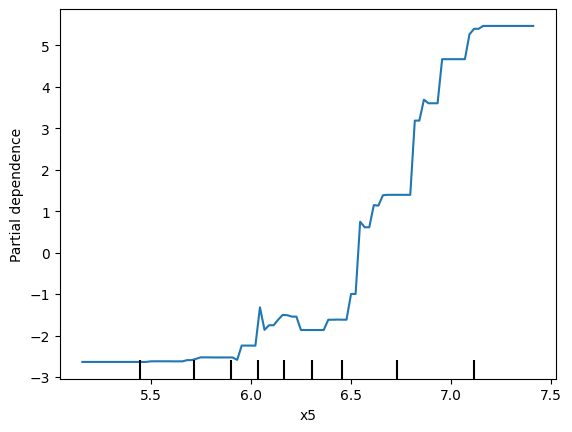

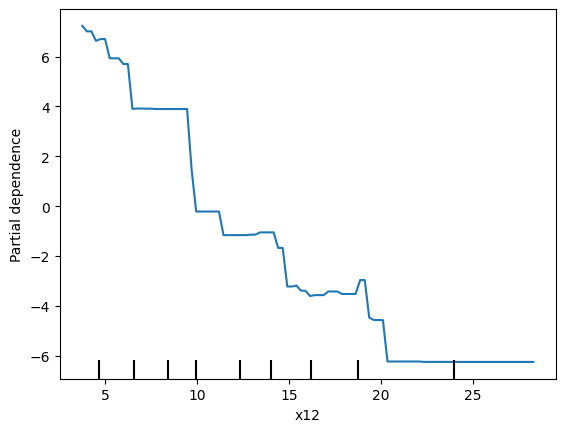

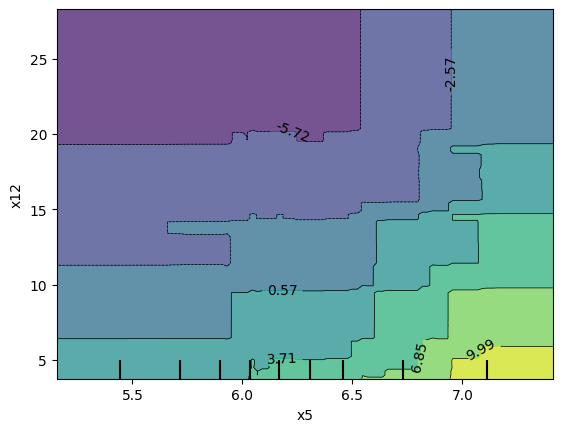

In [16]:
from sklearn.inspection import PartialDependenceDisplay
fig1=PartialDependenceDisplay.from_estimator(gbrg_best, X_train, features=[5])
fig2=PartialDependenceDisplay.from_estimator(gbrg_best, X_train, features=[12])
fig3=PartialDependenceDisplay.from_estimator(gbrg_best, X_train, features=[(5,12)])


In [18]:
# random forest 모형을 House 데이터에 적용한 예
X=house.iloc[:, :-1].values
y=house['MEDV'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.ensemble import RandomForestRegressor #max_depth=5
forest=RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1)
forest.fit(X_train, y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE train: %0.3f, test: %0.3f' %(np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R**2 train : %0.3f, test: %0.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

RMSE train: 1.261, test: 2.875
R**2 train : 0.980, test: 0.910


In [20]:
# XGBoost를 적용한 사례
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

X=house.iloc[:, :-1].values
y=house['MEDV'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

xg_reg=xgb.XGBRegressor(objective='reg:squarederror', booster='gbtree', colsample_bytree=0.75, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=30)
xg_reg.fit(X_train, y_train)
pred_train=xg_reg.predict(X_train)
pred_test=xg_reg.predict(X_test)
rmse_train=np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test, pred_test))
print('RMSE train : %0.3f, test: %0.3f' %(rmse_train, rmse_test))

RMSE train : 2.001, test: 3.763


In [22]:
paras={'objective':'reg:squarederror', 'colsample_bytree':0.6, 'max_depth':5, 'alpha':10}
data_dim1=xgb.DMatrix(data=X_train, label=y_train)
cv_result=xgb.cv(dtrain=data_dim1, params=paras, nfold=5, num_boost_round=60, early_stopping_rounds=20, metrics='rmse', as_pandas=True, seed=1)
cv_result.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,7.071085,0.098253,7.429003,0.577780
1,5.707328,0.108731,6.443313,0.632762
2,4.607930,0.073628,5.639665,0.394977
3,3.914355,0.082029,5.272458,0.491187
4,3.427226,0.090408,4.988406,0.470795


In [23]:
print(cv_result['test-rmse-mean'].tail(1))

59    4.063289
Name: test-rmse-mean, dtype: float64


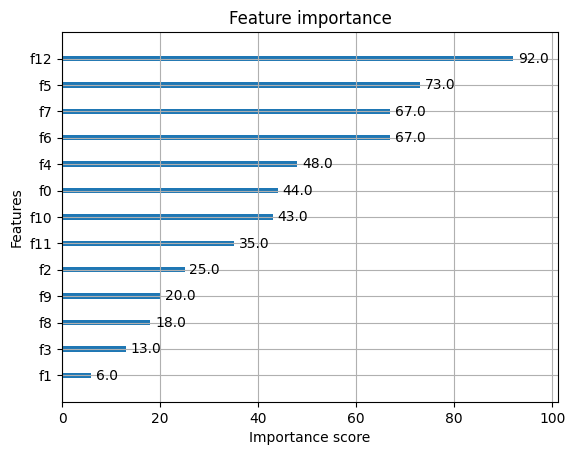

In [24]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize']=[5,5]
plt.show()


In [25]:
# XGBoost에 gridsearch를 교차검증을 통해 구하는 프로그램
from sklearn.model_selection import GridSearchCV
param={'max_depth':range(3,10,2), 'colsample_bytree':[i/100.0 for i in range(75, 90, 5)]}
xgsearch=GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, alpha=10), param_grid=param, scoring='neg_mean_squared_error', cv=5)
xgsearch.fit(X_train, y_train)
xgsearch.best_params_, xgsearch.best_score_

({'colsample_bytree': 0.75, 'max_depth': 3}, np.float64(-11.88531213798323))

In [31]:
# 경고 메시지 제거를 위한 설정
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMRegressor
lgbm_reg=LGBMRegressor(boosting_type='gbdt', colsample_bytree=0.75, learning_rate=0.1, max_depth=5, reg_alpha=10, n_estimators=30, min_child_samples=20, min_split_gain=0.1, verbose=-1)
lgbm_reg.fit(X_train, y_train)
pred_train = lgbm_reg.predict(X_train)
pred_test = lgbm_reg.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE train : %0.3f, test: %0.3f' %(rmse_train, rmse_test))

RMSE train : 3.045, test: 3.562


In [32]:
# CatBoost
X = house.iloc[:, :-1].values
y = house['MEDV'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train, y_train)

from catboost import Pool

train_dataset = Pool(data = X_train, label = y_train)
eval_dataset = Pool(data = X_test, label = y_test)

model = CatBoostRegressor(l2_leaf_reg = 0.01)
model.fit(train_dataset, use_best_model = True, eval_set = eval_dataset, verbose = False)
model.get_best_score()

Learning rate set to 0.034747
0:	learn: 8.8589352	total: 56.6ms	remaining: 56.5s
1:	learn: 8.6835131	total: 57ms	remaining: 28.5s
2:	learn: 8.5183964	total: 58ms	remaining: 19.3s
3:	learn: 8.3726939	total: 58.4ms	remaining: 14.6s
4:	learn: 8.2325333	total: 58.8ms	remaining: 11.7s
5:	learn: 8.1034567	total: 60ms	remaining: 9.94s
6:	learn: 7.9732383	total: 60.4ms	remaining: 8.57s
7:	learn: 7.8374744	total: 60.8ms	remaining: 7.54s
8:	learn: 7.7019703	total: 61.8ms	remaining: 6.8s
9:	learn: 7.5435282	total: 62.2ms	remaining: 6.15s
10:	learn: 7.4024317	total: 62.5ms	remaining: 5.62s
11:	learn: 7.2761529	total: 62.9ms	remaining: 5.18s
12:	learn: 7.1427295	total: 63.3ms	remaining: 4.8s
13:	learn: 7.0112960	total: 63.7ms	remaining: 4.48s
14:	learn: 6.8985189	total: 64.8ms	remaining: 4.25s
15:	learn: 6.7723068	total: 65.1ms	remaining: 4s
16:	learn: 6.6567722	total: 65.4ms	remaining: 3.78s
17:	learn: 6.5512510	total: 65.7ms	remaining: 3.59s
18:	learn: 6.4404943	total: 66.1ms	remaining: 3.41s
19:

{'learn': {'RMSE': 0.1679522008468206},
 'validation': {'RMSE': 2.865266680923542}}

In [34]:
model.get_best_iteration()

266